In [1]:
from run_kinfit import run_kinfit, build_custom_hypo
from draw_funcs import draw_1d_hist, draw_1d_hists
from ROOT import TFile, TCanvas
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
build_custom_hypo('Hypo2PiVertex.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/etapipi/2pi2gamma/Hypo2PiVertex_cpp.so


In [3]:
input_path = '/var/kinfit/data/tr_ph_run021142.root'
output_path = 'kinfit_etapipi_etato2gamma_run021142.root'

In [4]:
run_kinfit(input_path, output_path=output_path)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run021142.root Title: 
(TrPh &) @0x7f7d846ee000


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/etapipi/2pi2gamma/TrPh_C.so


In [5]:
fl = TFile.Open(output_path, 'read')

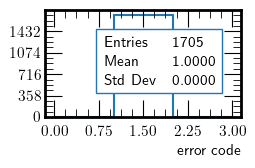

In [35]:
fl.kf_data.Draw("kf_err>>kf_err(3,0,3)", "kf_err==1", "goff")
draw_1d_hist("kf_err", xlabel='error code',
            fraction=0.47,
            info_coords=(0.3, 0.3))
plt.savefig('kf_err_2pi2gamma.eps')

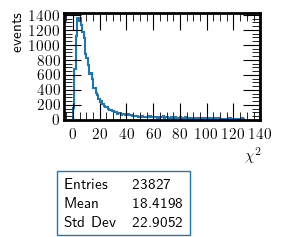

In [7]:
fl.kf_data.Draw("kf_chi2>>kf_chi2(128,0,128)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2", 
             xlabel=r'$\chi^2$',
             ylabel='events',
             fraction=0.47,
            info_coords=(0.0, -1.0),
            h_y=200, h_x=20)
plt.savefig('kf_chi2_2pi2gamma.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


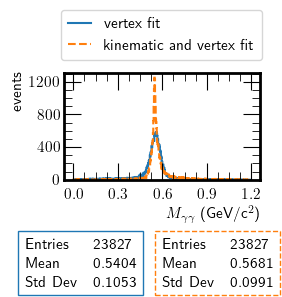

In [8]:
fl.kf_data.Draw("in_mgg>>in_mgg(512,0,1.2)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mgg>>kf_mgg(512,0,1.2)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx_mgg>>kf_vtx_mgg(512,0,1.2)", "kf_err==0", "goff")
draw_1d_hists([('kf_vtx_mgg', 'vertex fit'), ('kf_mgg', 'kinematic and vertex fit')], 
              xlabel=r'$M_{\gamma\gamma}$ (GeV/c$^2$)',
              ylabel='events',
             fraction=0.47,
             info_coords=(-0.2, -1.0),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
             h_y=400, h_x=0.3)
plt.savefig('kf_mgg_2pi2gamma.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


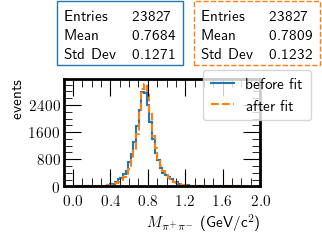

In [9]:
fl.kf_data.Draw("in_mpipi>>in_mpipi(64,0,1.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mpipi>>kf_mpipi(64,0,1.8)", "kf_err==0", "goff")
draw_1d_hists([('in_mpipi', 'before fit'), ('kf_mpipi', 'after fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
             fraction=0.47,
             info_coords=(0.0, 1.2),
             dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.9, 0.6, 0.4, 0.5),
             h_y=800, h_x=0.4)
plt.savefig('kf_m2pi_2pi2gamma.eps', bbox_inches='tight')

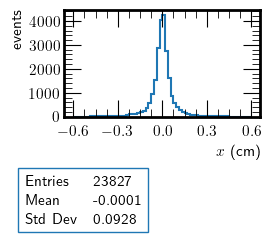

In [10]:
fl.kf_data.Draw("kf_vtx[0]>>kf_vtx_x(64, -0.6, 0.6)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_x", 
            fraction=0.47,
             info_coords=(-0.2, -1.0),
             h_y=1000, h_x=0.3,
             xlabel=r'$x$ (cm)',
            ylabel='events')
plt.savefig('etapipi_vtxsigma_vtx_x.eps')

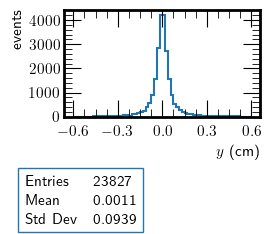

In [11]:
fl.kf_data.Draw("kf_vtx[1]>>kf_vtx_y(64, -0.6, 0.6)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_y", 
             fraction=0.47,
             info_coords=(-0.2, -1.0),
             h_y=1000, h_x=0.3,
             xlabel=r'$y$ (cm)',
            ylabel='events')
plt.savefig('etapipi_vtxsigma_vtx_y.eps')

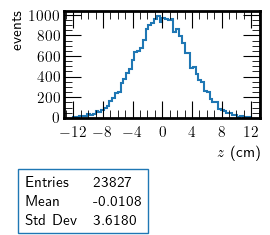

In [12]:
fl.kf_data.Draw("kf_vtx[2]>>kf_vtx_z(64, -12, 12)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_z", 
            fraction=0.47,
             info_coords=(-0.2, -1.0),
             h_y=200, h_x=4,
             xlabel=r'$z$ (cm)',
            ylabel='events')
plt.savefig('etapipi_vtxsigma_vtx_z.eps')

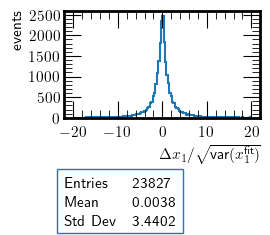

In [13]:
fl.kf_data.Draw("(kf_vtx[0]-sim_ee_vtx[0])/sigma_x_vtx0 >>kf_vtx_dx1(128, -20, 20)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dx1", 
             xlabel=r'$\Delta x_{1}/\sqrt{\text{var}(x^{\text{fit}}_1)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
           h_y=500, h_x=10)
plt.savefig('kskpi_vtxsigma_vtx0_dx_pull.eps', bbox_inches='tight')

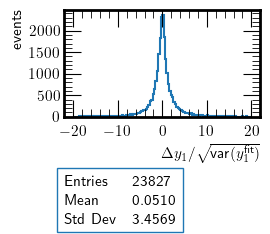

In [14]:
fl.kf_data.Draw("(kf_vtx[1]-sim_ee_vtx[1])/sigma_y_vtx0 >>kf_vtx_dy1(128, -20, 20)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dy1", 
             xlabel=r'$\Delta y_{1}/\sqrt{\text{var}(y^{\text{fit}}_1)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
           h_y=500, h_x=10)
plt.savefig('kskpi_vtxsigma_vtx0_dy_pull.eps', bbox_inches='tight')

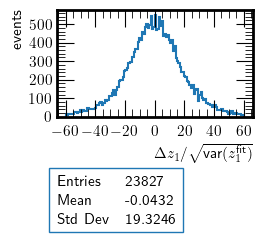

In [15]:
fl.kf_data.Draw("(kf_vtx[2]-sim_ee_vtx[2])/sigma_z_vtx0 >>kf_vtx_dz1(128, -60, 60)", "kf_err==0", "goff")
draw_1d_hist("kf_vtx_dz1", 
             xlabel=r'$\Delta z_{1}/\sqrt{\text{var}(z^{\text{fit}}_1)}$',
             ylabel='events',
            fraction=0.47,
            info_coords=(0.0, -1.0),
           h_y=100, h_x=20)
plt.savefig('kskpi_vtxsigma_vtx0_dz_pull.eps', bbox_inches='tight')

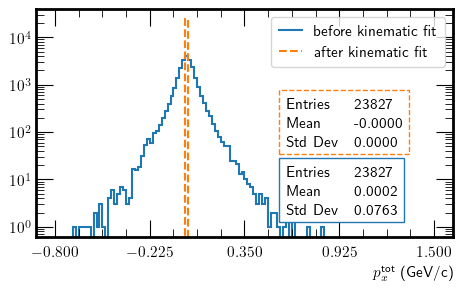

In [16]:
fl.kf_data.Draw("in_total_p[0]>>in_total_px(128,-0.8,1.5)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[0]>>kf_total_px(128,-0.8,1.5)", "kf_err==0", "goff")
draw_1d_hists([('in_total_px', 'before kinematic fit'), ('kf_total_px', 'after kinematic fit')], xlabel=r'$p^{\text{tot}}_x$ (GeV/c)', yscale='log')

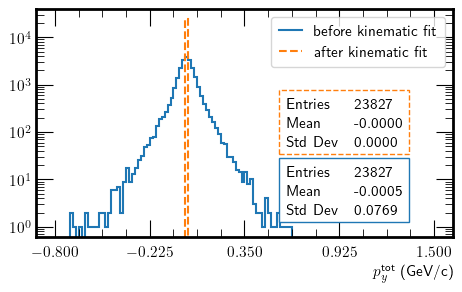

In [17]:
fl.kf_data.Draw("in_total_p[1]>>in_total_py(128,-0.8,1.5)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[1]>>kf_total_py(128,-0.8,1.5)", "kf_err==0", "goff")
draw_1d_hists([('in_total_py', 'before kinematic fit'), ('kf_total_py', 'after kinematic fit')], xlabel=r'$p^{\text{tot}}_y$ (GeV/c)', yscale='log')

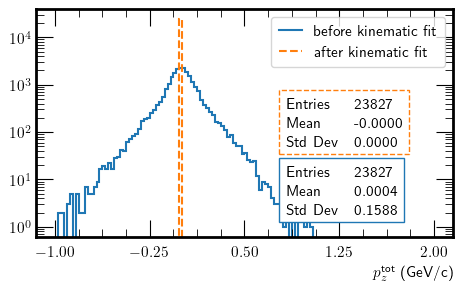

In [18]:
fl.kf_data.Draw("in_total_p[2]>>in_total_pz(128,-1.0,2.0)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[2]>>kf_total_pz(128,-1.0,2.0)", "kf_err==0", "goff")
draw_1d_hists([('in_total_pz', 'before kinematic fit'), ('kf_total_pz', 'after kinematic fit')], xlabel=r'$p^{\text{tot}}_z$ (GeV/c)', yscale='log')

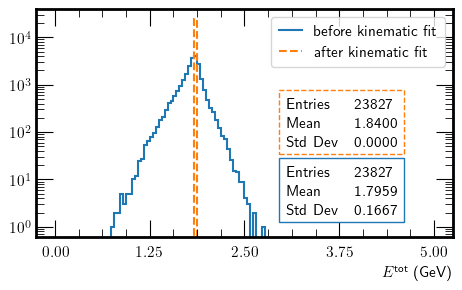

In [19]:
fl.kf_data.Draw("in_total_p[3]>>in_total_pe(128, 0, 5.0)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_total_p[3]>>kf_total_pe(128, 0, 5.0)", "kf_err==0", "goff")
draw_1d_hists([('in_total_pe', 'before kinematic fit'), ('kf_total_pe', 'after kinematic fit')], xlabel=r'$E^{\text{tot}}$ (GeV)', yscale='log')

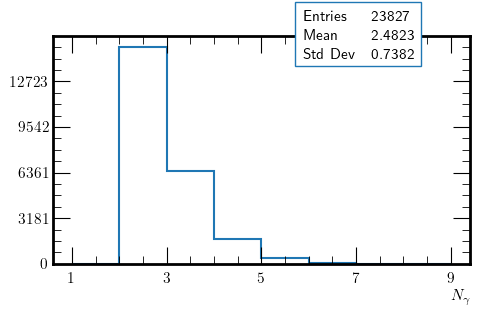

In [20]:
fl.kf_data.Draw("nph>>nph_err0", "kf_err==0", "goff")
draw_1d_hist("nph_err0", xlabel=r'$N_{\gamma}$')

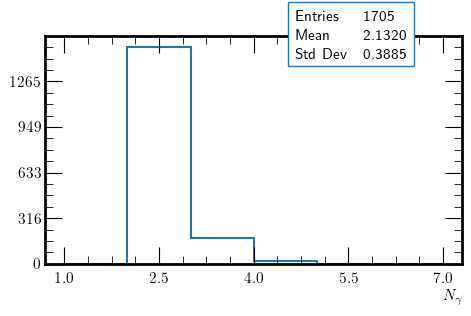

In [21]:
fl.kf_data.Draw("nph>>nph_err1", "kf_err==1", "goff")
draw_1d_hist("nph_err1", xlabel=r'$N_{\gamma}$')

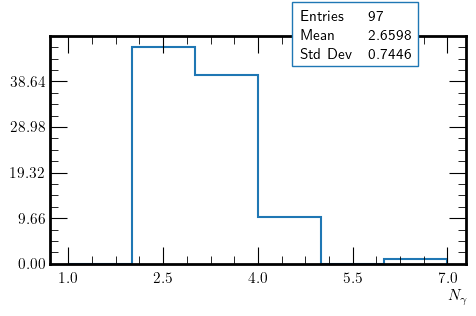

In [22]:
fl.kf_data.Draw("nph>>nph_err2", "kf_err==2", "goff")
draw_1d_hist("nph_err2", xlabel=r'$N_{\gamma}$')

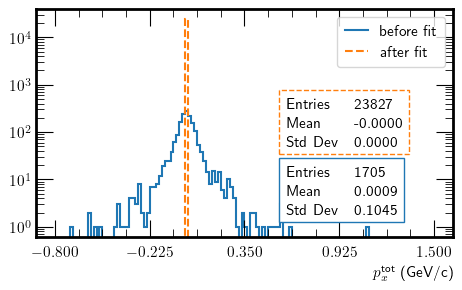

In [23]:
fl.kf_data.Draw("in_total_p[0]>>in_total_px_err1(128,-0.8,1.5)", "kf_err==1", "goff")
fl.kf_data.Draw("kf_total_p[0]>>kf_total_px_err1(128,-0.8,1.5)", "kf_err==1", "goff")
draw_1d_hists([('in_total_px_err1', 'before fit'), ('kf_total_px', 'after fit')], xlabel=r'$p^{\text{tot}}_x$ (GeV/c)', yscale='log')

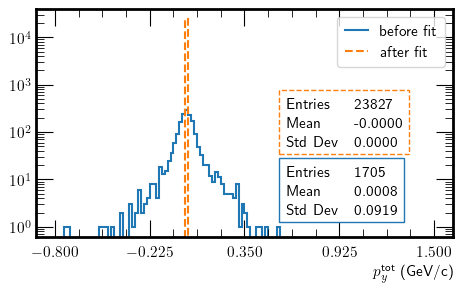

In [24]:
fl.kf_data.Draw("in_total_p[1]>>in_total_py_err1(128,-0.8,1.5)", "kf_err==1", "goff")
fl.kf_data.Draw("kf_total_p[1]>>kf_total_py_err1(128,-0.8,1.5)", "kf_err==1", "goff")
draw_1d_hists([('in_total_py_err1', 'before fit'), ('kf_total_py', 'after fit')], xlabel=r'$p^{\text{tot}}_y$ (GeV/c)', yscale='log')

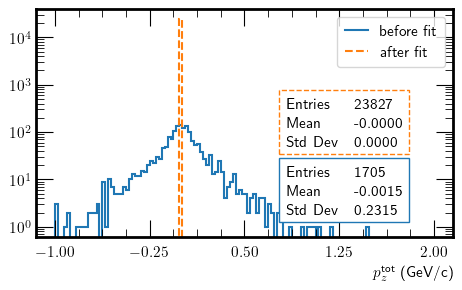

In [25]:
fl.kf_data.Draw("in_total_p[2]>>in_total_pz_err1(128,-1.0,2.0)", "kf_err==1", "goff")
fl.kf_data.Draw("kf_total_p[2]>>kf_total_pz_err1(128,-1.0,2.0)", "kf_err==1", "goff")
draw_1d_hists([('in_total_pz_err1', 'before fit'), ('kf_total_pz', 'after fit')], xlabel=r'$p^{\text{tot}}_z$ (GeV/c)', yscale='log')

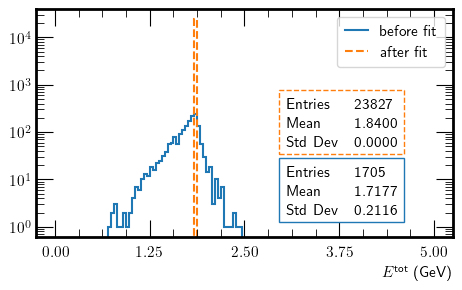

In [26]:
fl.kf_data.Draw("in_total_p[3]>>in_total_pe_err1(128, 0, 5.0)", "kf_err==1", "goff")
fl.kf_data.Draw("kf_total_p[3]>>kf_total_pe_err1(128, 0, 5.0)", "kf_err==1", "goff")
draw_1d_hists([('in_total_pe_err1', 'before fit'), ('kf_total_pe', 'after fit')], xlabel=r'$E^{\text{tot}}$ (GeV)', yscale='log')

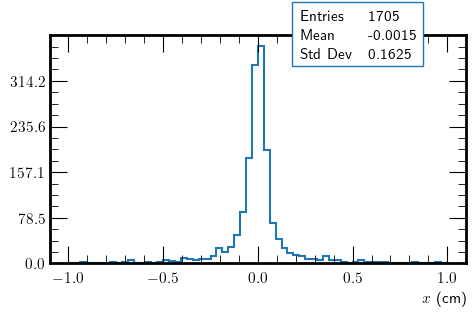

In [27]:
fl.kf_data.Draw("kf_vtx[0]>>kf_vtx_x_err1(64, -1, 1)", "kf_err==1", "goff")
draw_1d_hist("kf_vtx_x_err1", xlabel=r'$x$ (cm)')

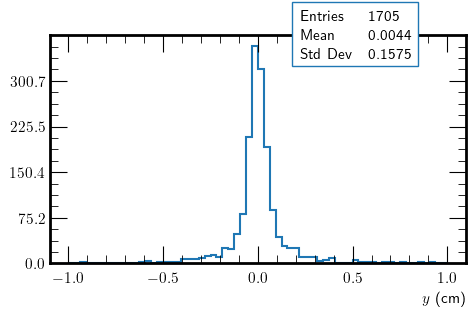

In [28]:
fl.kf_data.Draw("kf_vtx[1]>>kf_vtx_y_err1(64, -1, 1)", "kf_err==1", "goff")
draw_1d_hist("kf_vtx_y_err1", xlabel=r'$y$ (cm)')

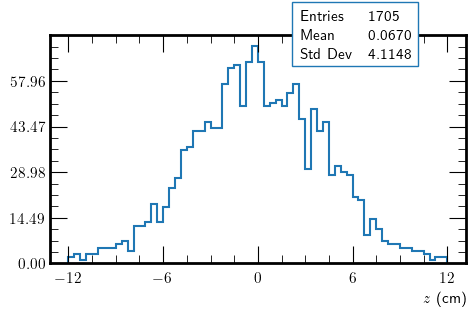

In [29]:
fl.kf_data.Draw("kf_vtx[2]>>kf_vtx_z_err1(64, -12, 12)", "kf_err==1", "goff")
draw_1d_hist("kf_vtx_z_err1", xlabel=r'$z$ (cm)')

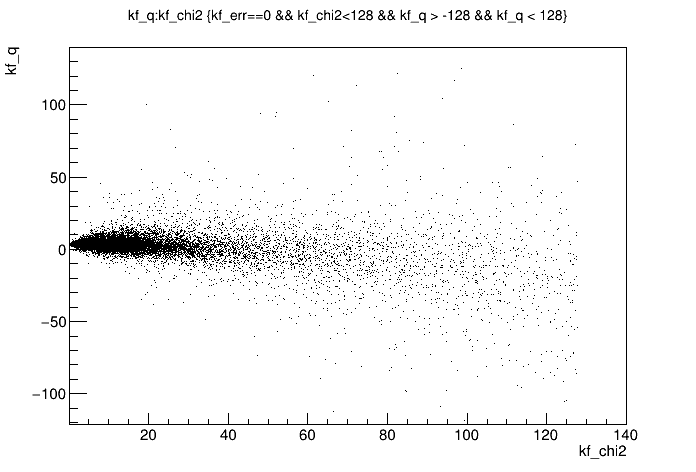

In [30]:
cnv = TCanvas()
fl.kf_data.Draw('kf_q:kf_chi2', 'kf_err==0 && kf_chi2<128 && kf_q > -128 && kf_q < 128')
cnv.Draw()

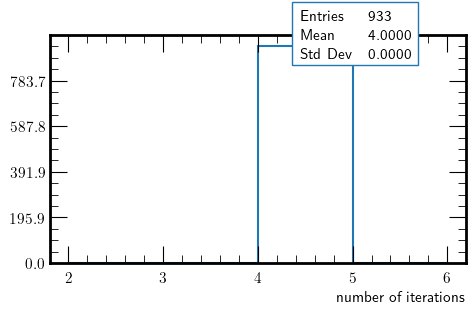

In [31]:
fl.kf_data.Draw("numiters>>numiters", "kf_err==0 && numiters==4", "goff")
draw_1d_hist("numiters", xlabel=r'number of iterations')

In [32]:
# fl.Close()